In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import jax.numpy as jnp
import os

In [2]:
# Iterate over all files in the directory
traces = {}              
# for path, dir, files in os.walk('/media/avena/Sandisk SDD/outputs_laboursim_numpyro/'):
for path, dir, files in os.walk('../outputs/'):
    for file in files:
        if file.endswith(".nc"):
            print(path.split("/")[-1], file)
            trace = az.from_netcdf(f'{path}/{file}')
            traces[f"{path.split('/')[-1]}"] = trace

MNPind2_MNPind1_no_grad_refyear trace.nc
MNPind1_all_vars_no_pooled_ind trace.nc
MNPind5_MNPind4_no_part_time trace.nc
MNPind4_MNPind3_no_public_sector trace.nc
MNPind3_MNPind2_no_self_emp trace.nc


/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (35), generating only 20 plots
  warnings.warn(


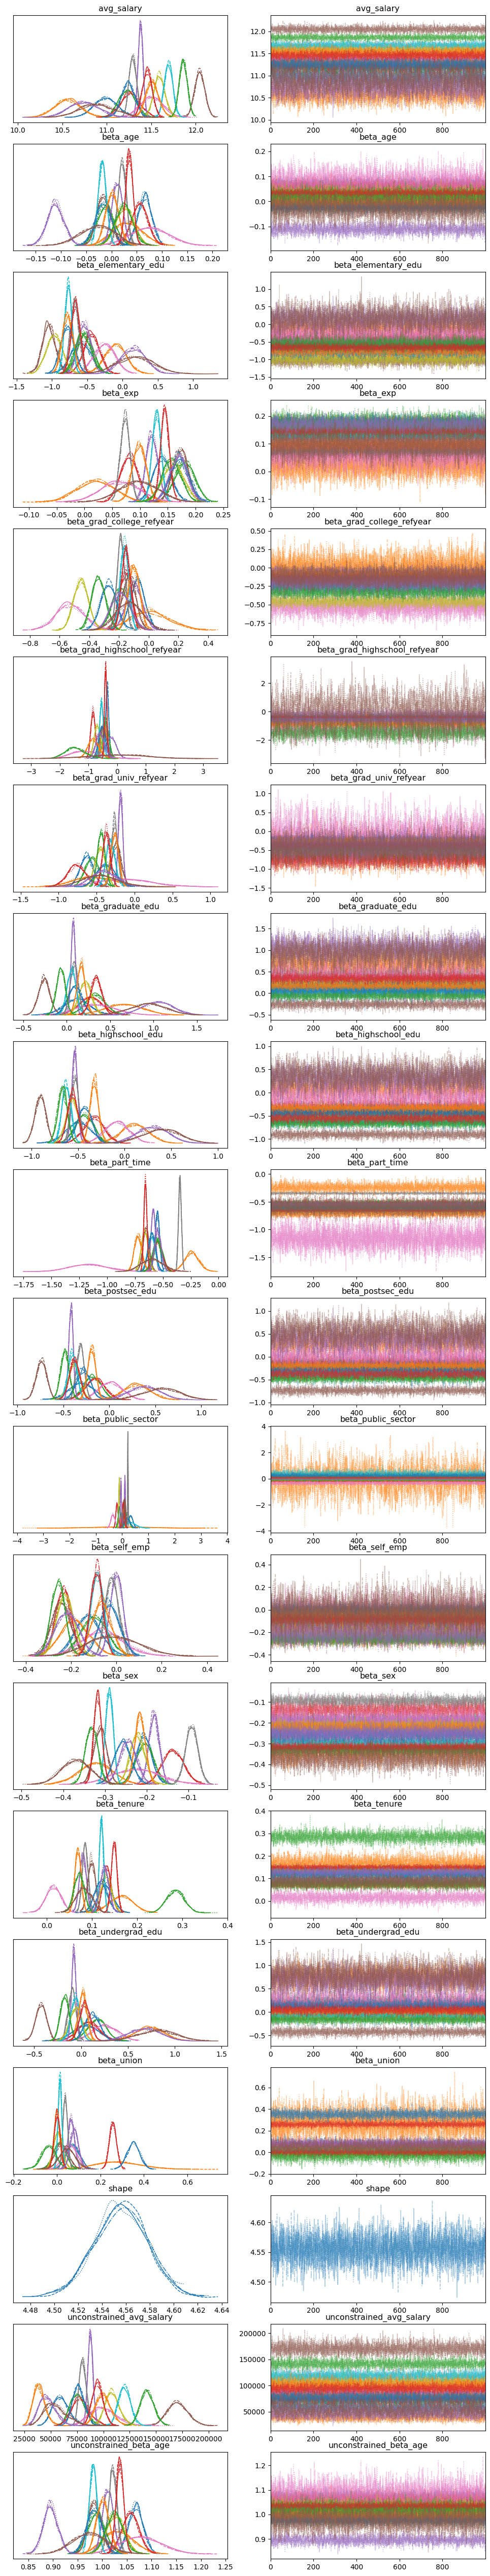

In [4]:
az.plot_trace(traces["MNPind1_all_vars_no_pooled_ind"], figsize=(12, 65));

In [7]:
az.compare(traces)

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


rank       elpd_loo      p_loo     elpd_diff  \
MP1_all_vars_pooled          0 -949768.885883  24.553087      0.000000   
MP2_MP1_no_grad_refyear      1 -950356.383366  20.222249    587.497483   
MP3_MP2_no_self_emp          2 -950439.465341  18.387867    670.579458   
MP4_MP3_no_public_sector     3 -950550.057406  17.422683    781.171523   
MP5_MP4_no_part_time         4 -954387.849113  14.871651   4618.963230   
MP6_MP5_no_union             5 -954746.190044  13.757833   4977.304162   
MP7_MP6_no_tenure            6 -956482.502799  12.036918   6713.616916   
MP8_MP7_no_age               7 -956501.397493  11.004398   6732.511610   
MP9_MP8_no_edu               8 -962918.886365   4.909003  13150.000482   
MP10_MP9_no_sex              9 -965482.442836   3.775093  15713.556953   
MP11_MP10_no_exp            10 -971013.219496   2.539303  21244.333614   

                            weight          se         dse  warning scale  
MP1_all_vars_pooled       1.000000  312.482099    0.000000    False   log  
MP2_MP1_no_grad_refyear   0.004443  310.894709   40.361719    False   log  
MP3_MP2_no_self_emp       0.004412  311.164470   43.035949    False   log  
MP4_MP3_no_public_sector  0.004370  308.509411   45.042381    False   log  
MP5_MP4_no_part_time      0.002998  289.030039  109.505487    False   log  
MP6_MP5_no_union          0.002894  282.638495  113.349970    False   log  
MP7_MP6_no_tenure         0.002430  268.736356  128.615270    False   log  
MP8_MP7_no_age            0.002427  268.891041  128.683818    False   log  
MP9_MP8_no_edu            0.001165  271.235484  163.854701    False   log  
MP10_MP9_no_sex           0.000773  275.444302  175.796797    False   log  
MP11_MP10_no_exp          0.000000  255.189516  191.124979    False   log

In [3]:
trace_ind = az.from_netcdf('../outputs/MNPind4_MNPind3_no_public_sector/trace.nc')

In [4]:
az.compare({"pooled":traces['MP4_MP3_no_public_sector'], "no-pooled": trace_ind})

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

rank       elpd_loo       p_loo    elpd_diff    weight          se  \
no-pooled     0 -945877.227653  245.558270     0.000000  0.923209  314.026511   
pooled        1 -950550.057406   17.422683  4672.829753  0.076791  308.509411   

                  dse  warning scale  
no-pooled    0.000000     True   log  
pooled     112.353908    False   log

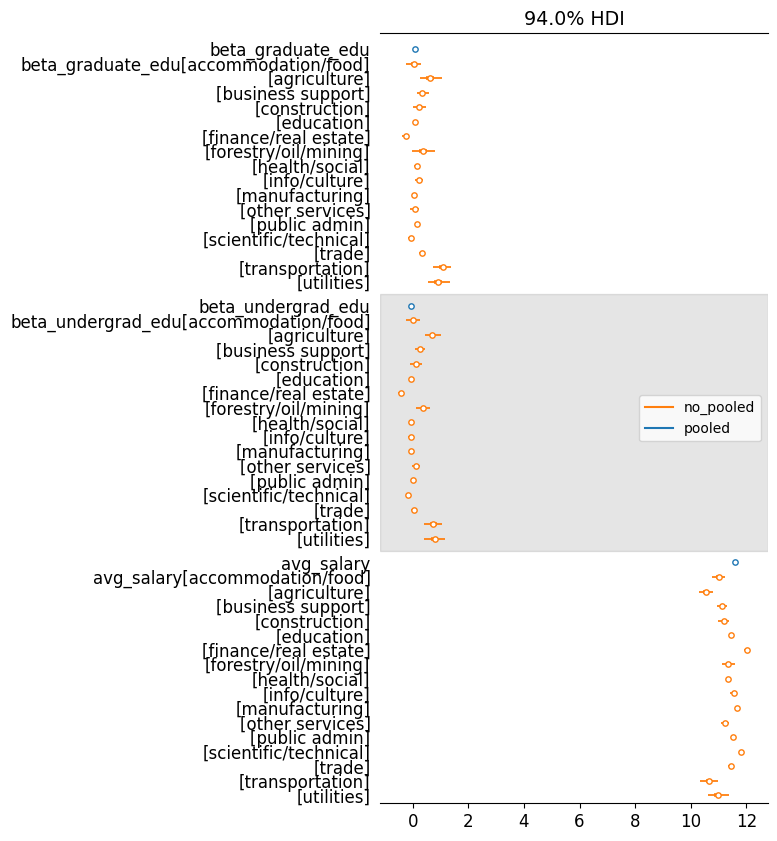

In [47]:
# models = [traces['MP10_MP9_no_sex'],traces['MP9_MP8_no_edu'],traces['MP8_MP7_no_age'],traces['MP7_MP6_no_tenure'],
models = [traces['MP6_MP5_no_union'], trace_ind]
axes = az.plot_forest(models, combined=True, legend=True, #combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                  #     model_names=["exp",'sex','edu','age','tenure'],
                  model_names=['pooled','no_pooled'],
                            figsize=(5, 10), var_names=["beta_graduate_edu","beta_undergrad_edu","avg_salary"], textsize=12)

# legend = axes[0].get_legend()
# legend.set_bbox_to_anchor((1.05, 0.5))

# # Add a title
# plt.suptitle('Estimated intercept (base salary by industry)', fontsize=16, x=0.5, y=0.94);
# axes[0].set_title('95% High Density Interval', fontsize=10);

# # Add a vertical line at 0
# axes[0].axvline(100, color='k', linestyle='--', alpha=0.5);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


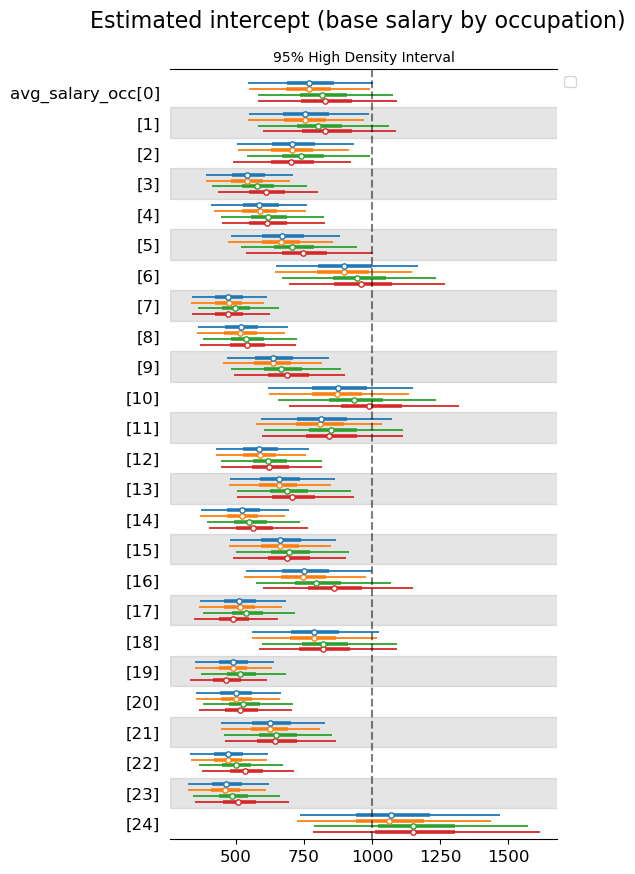

In [210]:
models = [traces['M10-M9+age'], traces['M9-M8+firm_size'], traces['M8-M7+self_emp'], traces['M2-M1+edu_level']]
axes = az.plot_forest(models, combined=True,legend=True, #combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                      model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 10), var_names=["avg_salary_occ"], filter_vars="like", textsize=12)

# Locate legend outside the plot
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1));

# Add a title
plt.suptitle('Estimated intercept (base salary by occupation)', fontsize=16, x=0.5, y=0.94);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(1000, color='k', linestyle='--', alpha=0.5);

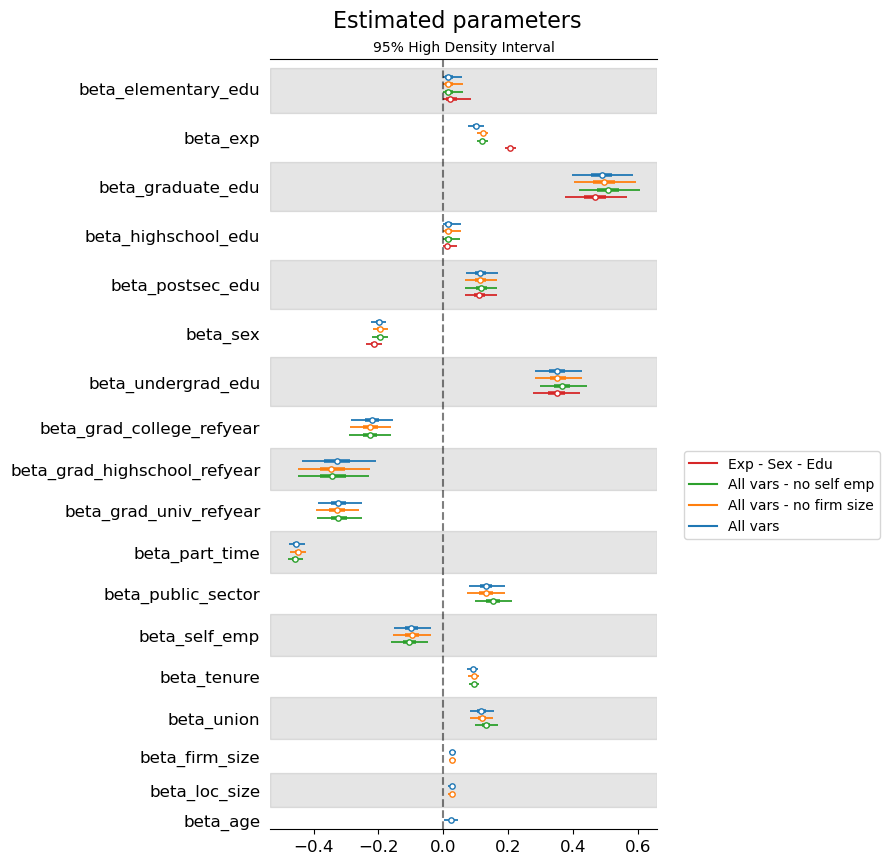

In [185]:
axes = az.plot_forest(models, combined=True, combine_dims={"avg_salary_ind_dim_0","avg_salary_occ_dim_0"},
                    model_names=["All vars","All vars - no firm size","All vars - no self emp","Exp - Sex - Edu"],
                            figsize=(5, 10), var_names=["~avg_salary_ind","~avg_salary_occ","~shape"], filter_vars="like", textsize=12)

legend = axes[0].get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))

# Add a title
plt.suptitle('Estimated parameters', fontsize=16, x=0.5, y=0.93);
axes[0].set_title('95% High Density Interval', fontsize=10);

# Add a vertical line at 0
axes[0].axvline(0, color='k', linestyle='--', alpha=0.5);

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import jax.numpy as jnp
import os

In [2]:
trace = az.from_netcdf('../outputs/workflow_example/test/2011/trace.nc')
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [2]:
trace = az.from_netcdf('../scripts/trace (4).nc')
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

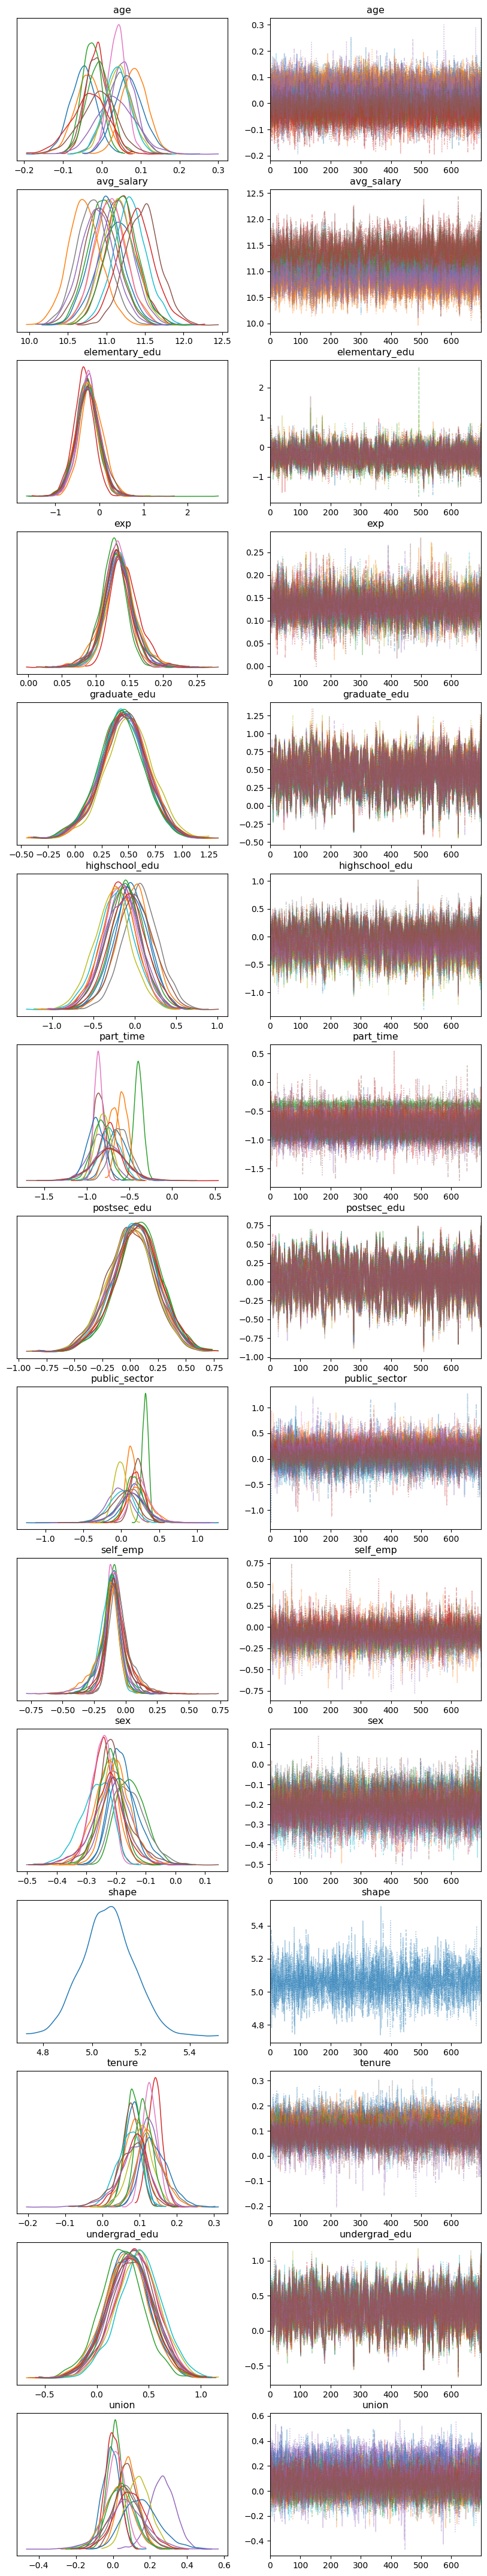

In [4]:
az.plot_trace(az.from_netcdf('../outputs/workflow_example/test/2011/trace.nc'), var_names=["~mu_","~sigma","~offset_"], filter_vars="like", figsize=(10, 55), combined=True);

In [2]:
trace = az.from_netcdf('../outputs/workflow_example/test/2011/trace_0.nc')

In [3]:
az.summary(trace, var_names=["offset"], filter_vars="like", round_to=5)

mean       sd   hdi_3%  hdi_97%  \
offset_avg_salary[public admin]          0.82595  0.31245  0.27866  1.29880   
offset_avg_salary[transportation]       -0.27493  0.24993 -0.69575  0.18190   
offset_avg_salary[health/social]        -0.09385  0.23663 -0.51431  0.32663   
offset_avg_salary[manufacturing]         0.13494  0.24020 -0.23498  0.55557   
offset_avg_salary[construction]          0.04439  0.25128 -0.36186  0.48852   
offset_avg_salary[education]             0.43615  0.26309 -0.01626  0.85250   
offset_avg_salary[trade]                -0.84504  0.24446 -1.26594 -0.36282   
offset_avg_salary[business support]     -1.19335  0.29670 -1.76143 -0.63173   
offset_avg_salary[info/culture]          0.11014  0.28875 -0.40644  0.59517   
offset_avg_salary[scientific/technical]  0.64068  0.28607  0.19739  1.14162   
offset_avg_salary[other services]       -0.75401  0.26382 -1.19455 -0.26307   
offset_avg_salary[accommodation/food]   -1.95990  0.37440 -2.67062 -1.26477   
offset_avg_salary[finance/real estate]   0.09011  0.23450 -0.26953  0.52944   
offset_avg_salary[utilities]             1.66892  0.43378  0.85335  2.37370   
offset_avg_salary[agriculture]          -1.22226  0.38278 -2.00384 -0.58583   
offset_avg_salary[forestry/oil/mining]   1.12288  0.36935  0.40552  1.70963   
offset_exp[public admin]                -0.86094  0.42606 -1.75159 -0.11366   
offset_exp[transportation]              -0.31460  0.41865 -1.04381  0.52899   
offset_exp[health/social]               -0.31663  0.36245 -0.96251  0.31097   
offset_exp[manufacturing]                0.41977  0.38339 -0.21074  1.12385   
offset_exp[construction]                 0.74730  0.41845 -0.07112  1.42695   
offset_exp[education]                   -0.31111  0.34933 -1.00573  0.31083   
offset_exp[trade]                        1.41911  0.48937  0.60314  2.30751   
offset_exp[business support]             0.15802  0.53382 -0.89220  1.09206   
offset_exp[info/culture]                 0.73001  0.57172 -0.15342  1.75960   
offset_exp[scientific/technical]        -0.74152  0.42422 -1.71385 -0.07523   
offset_exp[other services]               0.99053  0.51605  0.18709  2.04892   
offset_exp[accommodation/food]           1.57689  0.48448  0.54875  2.42632   
offset_exp[finance/real estate]         -0.17305  0.41068 -0.88012  0.69348   
offset_exp[utilities]                   -0.77212  0.74184 -2.04687  0.82151   
offset_exp[agriculture]                  0.75190  0.73679 -0.57799  1.99827   
offset_exp[forestry/oil/mining]          0.43065  0.57631 -0.58905  1.50647   

                                         mcse_mean  mcse_sd  ess_bulk  \
offset_avg_salary[public admin]            0.12872  0.09595   6.27135   
offset_avg_salary[transportation]          0.08686  0.06372   8.51843   
offset_avg_salary[health/social]           0.09093  0.06729   6.97147   
offset_avg_salary[manufacturing]           0.09669  0.07189   6.42512   
offset_avg_salary[construction]            0.10119  0.07524   6.48473   
offset_avg_salary[education]               0.10686  0.07953   6.45141   
offset_avg_salary[trade]                   0.07058  0.05117  12.60323   
offset_avg_salary[business support]        0.06349  0.04551  22.27052   
offset_avg_salary[info/culture]            0.11423  0.08478   6.63294   
offset_avg_salary[scientific/technical]    0.11760  0.08764   6.31193   
offset_avg_salary[other services]          0.07376  0.05339  13.26975   
offset_avg_salary[accommodation/food]      0.06201  0.04420  36.91509   
offset_avg_salary[finance/real estate]     0.08891  0.06571   7.47317   
offset_avg_salary[utilities]               0.15952  0.11757   7.94052   
offset_avg_salary[agriculture]             0.06398  0.04561  35.23489   
offset_avg_salary[forestry/oil/mining]     0.13584  0.10012   8.10094   
offset_exp[public admin]                   0.09631  0.06914  19.42548   
offset_exp[transportation]                 0.12046  0.08733  12.93954   
offset_exp[health/social]                  0.0951

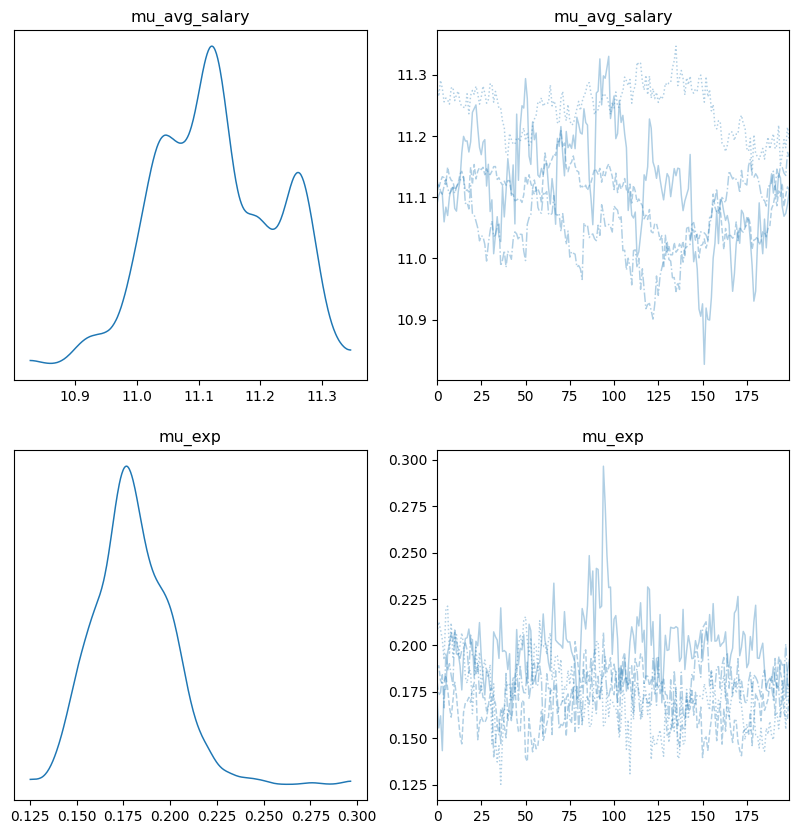

In [7]:
az.plot_trace(az.from_netcdf('../outputs/workflow_example/test/2011/trace_1.nc'), var_names=["mu_"], filter_vars="like", figsize=(10, 10), combined=True);

In [4]:
az.summary(trace)["r_hat"].max()

4.45

In [3]:
post = trace.posterior.copy()
post

<xarray.Dataset>
Dimensions:                                     (chain: 4, draw: 10)
Coordinates:
  * chain                                       (chain) int64 0 1 2 3
  * draw                                        (draw) int64 0 1 2 3 4 5 6 7 8 9
Data variables: (12/35)
    avg_salary                                  (chain, draw) float32 ...
    beta_age                                    (chain, draw) float32 ...
    beta_elementary_edu                         (chain, draw) float32 ...
    beta_exp                                    (chain, draw) float32 ...
    beta_grad_college_refyear                   (chain, draw) float32 ...
    beta_grad_highschool_refyear                (chain, draw) float32 ...
    ...                                          ...
    unconstrained_beta_public_sector            (chain, draw) float32 ...
    unconstrained_beta_self_emp                 (chain, draw) float32 ...
    unconstrained_beta_sex                      (chain, draw) float32 ...
    unconstrained_beta_tenure                   (chain, draw) float32 ...
    unconstrained_beta_undergrad_edu            (chain, draw) float32 ...
    unconstrained_beta_union                    (chain, draw) float32 ...
Attributes:
    created_at:                 2023-09-28T14:45:47.464349
    arviz_version:              0.16.1
    inference_library:          numpyro
    inference_library_version:  0.13.2

In [4]:
trace.add_groups(test=post)

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/data/inference_data.py:1509: UserWarning: The group test is not defined in the InferenceData scheme
  warnings.warn(


In [5]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> test

In [10]:
trace["posterior"]

<xarray.Dataset>
Dimensions:                                     (chain: 4, draw: 10)
Coordinates:
  * chain                                       (chain) int64 0 1 2 3
  * draw                                        (draw) int64 0 1 2 3 4 5 6 7 8 9
Data variables: (12/35)
    avg_salary                                  (chain, draw) float32 ...
    beta_age                                    (chain, draw) float32 ...
    beta_elementary_edu                         (chain, draw) float32 ...
    beta_exp                                    (chain, draw) float32 ...
    beta_grad_college_refyear                   (chain, draw) float32 ...
    beta_grad_highschool_refyear                (chain, draw) float32 ...
    ...                                          ...
    unconstrained_beta_public_sector            (chain, draw) float32 ...
    unconstrained_beta_self_emp                 (chain, draw) float32 ...
    unconstrained_beta_sex                      (chain, draw) float32 ...
    unconstrained_beta_tenure                   (chain, draw) float32 ...
    unconstrained_beta_undergrad_edu            (chain, draw) float32 ...
    unconstrained_beta_union                    (chain, draw) float32 ...
Attributes:
    created_at:                 2023-09-28T14:45:47.464349
    arviz_version:              0.16.1
    inference_library:          numpyro
    inference_library_version:  0.13.2

In [7]:
trace.sel(groups=["~test"], filter_groups="like")

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> test

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (35), generating only 20 plots
  warnings.warn(


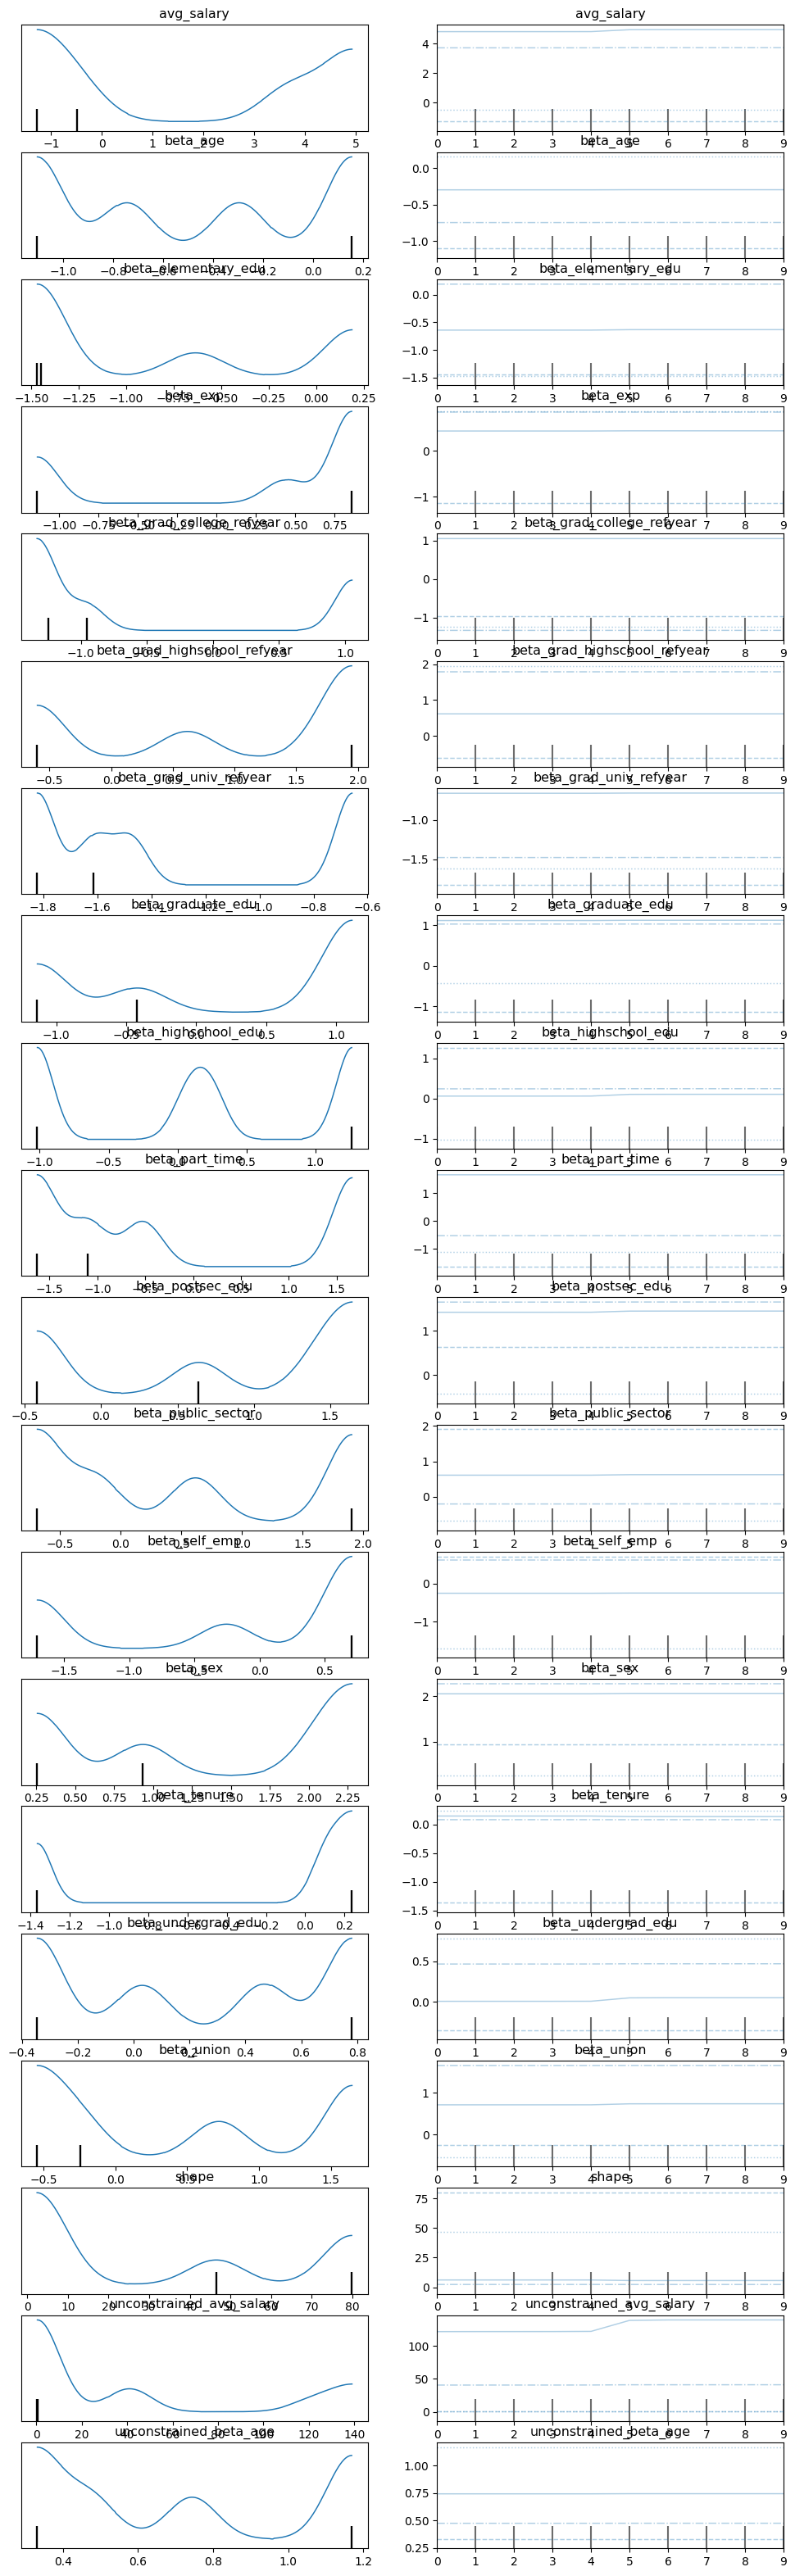

In [6]:
az.plot_trace(trace, combined=True);

In [15]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [18]:
az.waic(trace)

/home/avena/miniconda3/envs/numpyro/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 8000 posterior samples and 4515 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -53348.45    60.13
p_waic       29.05        -

There has been a warning during the calculation. Please check the results.

In [9]:
az.loo(trace, pointwise=True)

Computed from 4000 posterior samples and 4515 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -52827.12    61.99
p_loo       56.32        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     4515  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%